<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div>

## ET5003_CS6134  Machine Learning Applications
## SEM1 2022/3

### ET5003_CS6134 Etivity 2 - Building a Bayesian Network on a Real-Life Scenario

### Instructor: Emil Vassev
October 3rd, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red">TODO: add your name here</span>
### Student Surname: <span style="color:red">TODO: add your surname here</span>
### Student ID: <span style="color:red">TODO: add your student ID here</span>
### Date of Final Submission: <span style="color:red">TODO: put the date when you submitted for grading</span>
***

### Task
In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in the interactive lesson “Notebook Lesson: Building Bayesian Networks with Python”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures.

## The real-life scenario
Let’s suppose that a UL student is taking the ET5003 module “Machine Learning Applications”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity.

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (20%)

### Step 1.1. Describe the problem (5%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

**Intelligence (I):** Domain - {Low, High}

**Module Difficulty (D):** Domain - {Easy, Hard}

**Health Status (H):** Domain - {Sick, Healthy}

**Grade (G):** Domain - {A, B, C}

**Forum Activity (F):** Domain - {Not Active, Active}

**Recommendation Letter Quality (R):** Domain - {Weak, Strong}



The student's intelligence, module difficulty, and health status are independent variables that directly affect the grade.
The grade, along with the student's forum activity, then influences the quality of the recommendation letter they receive from the professor.

### Step 1.2. Draw and show the DAG (7%)

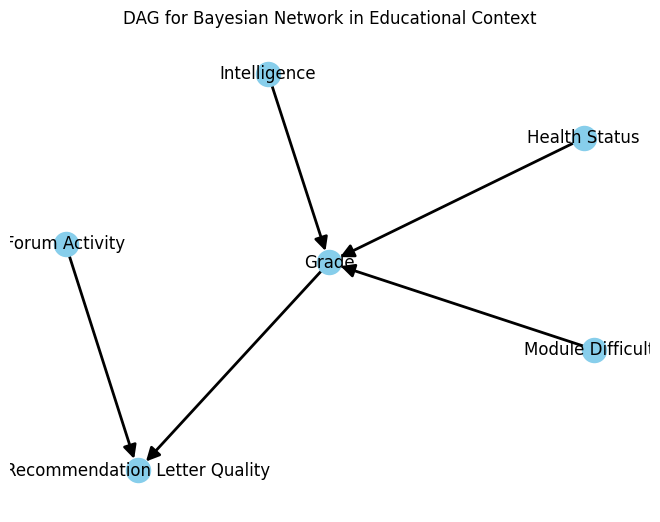

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes for the Bayesian Network
G.add_nodes_from(["Intelligence", "Module Difficulty", "Health Status", "Grade", "Forum Activity", "Recommendation Letter Quality"])

# Adding edges to represent dependencies
G.add_edge("Intelligence", "Grade")
G.add_edge("Module Difficulty", "Grade")
G.add_edge("Health Status", "Grade")
G.add_edge("Grade", "Recommendation Letter Quality")
G.add_edge("Forum Activity", "Recommendation Letter Quality")

# Creating a layout for our nodes
pos = nx.spring_layout(G)

# Drawing the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='black', width=2, arrowsize=20, font_size=12)

# Display the graph
plt.title("DAG for Bayesian Network in Educational Context")
plt.show()


### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (7%)

In [6]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.3 MB/s eta 0:00:00


In [7]:
from pgmpy.models import BayesianNetwork
import networkx as nx
import matplotlib.pyplot as plt

# Define the Bayesian Network structure
model = BayesianNetwork([
    ("Intelligence", "Grade"),
    ("Module Difficulty", "Grade"),
    ("Health Status", "Grade"),
    ("Grade", "Recommendation Letter Quality"),
    ("Forum Activity", "Recommendation Letter Quality")
])


# Create a networkx graph from the Bayesian Network
G = nx.DiGraph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())



### Step 1.4. Show the DAG of the Bayesian Network (1%)

### Graphical Representation in a DAG (Directed Acyclic Graph)

* Intelligence (I) → Grade (G)
* Module Difficulty (D) → Grade (G)
* Health Status (H) → Grade (G)
* Grade (G) → Recommendation Letter Quality (R)

* Forum Activity (F) → Recommendation Letter Quality (R)

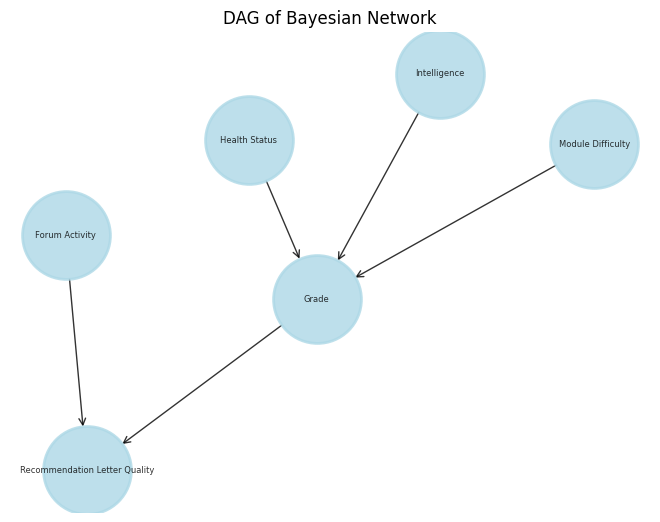

In [8]:
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='lightblue', node_shape='o', alpha=0.8, linewidths=2, font_size=6, arrows=True, arrowstyle='->', arrowsize=12)
plt.title("DAG of Bayesian Network")
plt.show()


## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (50%)

### Step 2.1: Build the probability distribution tables with TabularCPD (46%)

In [9]:
from pgmpy.factors.discrete import TabularCPD

#  ("Intelligence", "Grade"),
#     ("Module Difficulty", "Grade"),
#     ("Health Status", "Grade"),
#     ("Grade", "Recommendation Letter Quality"),
#     ("Forum Activity", "Recommendation Letter Quality")

# CPD for Intelligence
cpd_intelligence = TabularCPD(variable='Intelligence', variable_card=2, values=[[0.7], [0.3]])

# CPD for Module Difficulty
cpd_difficulty = TabularCPD(variable='Module Difficulty', variable_card=2, values=[[0.6], [0.4]])

# CPD for Health Status
cpd_health = TabularCPD(variable='Health Status', variable_card=2, values=[[0.8], [0.2]])

# CPD for Grade
# Assuming Grade depends on Intelligence, Difficulty, and Health
cpd_grade = TabularCPD(variable='Grade', variable_card=3,
                       values=[[0.3, 0.05, 0.9, 0.5, 0.8, 0.6, 0.1, 0.4],
                               [0.4, 0.25, 0.08, 0.3, 0.15, 0.3, 0.6, 0.5],
                               [0.3, 0.7, 0.02, 0.2, 0.05, 0.1, 0.3, 0.1]],
                       evidence=['Intelligence', 'Module Difficulty', 'Health Status'], evidence_card=[2, 2, 2])

# CPD for Forum Activity
cpd_forum = TabularCPD(variable='Forum Activity', variable_card=2, values=[[0.6], [0.4]])

# CPD for Recommendation Letter Quality
# Assuming Quality depends on Grade and Forum Activity
cpd_recommendation = TabularCPD(variable='Recommendation Letter Quality', variable_card=2,
                                values=[[0.1, 0.4, 0.99, 0.7, 0.6, 0.85],
                                        [0.9, 0.6, 0.01, 0.3, 0.4, 0.15]],
                                evidence=['Grade', 'Forum Activity'], evidence_card=[3, 2])




### Step 2.2: Associate the distribution models with the network structure (2%)

In [10]:
# Add these CPDs to the model
model.add_cpds(cpd_intelligence, cpd_difficulty, cpd_health, cpd_grade, cpd_forum, cpd_recommendation)

# Validate the model
assert model.check_model()

### Step 2.3: Check the model (2%)

In [11]:
model.check_model()


True

## Step 3: Inference with the Bayesian Network (30%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence

---

is a strong recommendation letter (10%)

In [17]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)


The conditional probability is calculated as shown

$$
P(\text{Cause} \mid \text{Evidence}) = \frac{P(\text{Evidence} \mid \text{Cause}) \times P(\text{Cause})}{P(\text{Evidence})}
$$

Where
* Posterior probability  = $P(\text{Cause} \mid \text{Evidence})$
* Likelihood = $P(\text{Evidence} \mid \text{Cause})$  
* Prior probability = $P(\text{Cause})$
* Evidence = $P(\text{Evidence})$


**Intelligence (I):** Domain - {Low, High}

**Module Difficulty (D):** Domain - {Easy, Hard}

**Health Status (H):** Domain - {Sick, Healthy}

**Grade (G):** Domain - {A, B, C}

**Forum Activity (F):** Domain - {Not Active, Active}

**Recommendation Letter Quality (R):** Domain - {Weak, Strong}

In [29]:

# Defining the wanted evidence. For example, let's say Intelligence is High  and Health Status is Good (H='Good')



### Step 3.2: Infer Prior Probability of having a strong recommendation letter with no evidence (10%)

In [ ]:
# your code goes here

In [ ]:
# show the prior probability results
# your code goes here

### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (10%)

In [ ]:
# your code goes here

In [ ]:
# show the prior probability results
# your code goes here